In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt

import sys
sys.path.append('./extraction_scripts')
import map_fxn as mf
import numpy as np
import netCDF4 as nc
from matplotlib.patches import Rectangle

from salishsea_tools import (
    viz_tools)

plt.rcParams.update({'font.size': 10})

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

    # STRATOGEM STATION S3(lat,lon)=(49 7.5 N, 123 33.5 W)
    'S3': {
        'lon lat': (-123.558, 49.125),
        'NEMO grid ji': (450, 258),
        'GEM2.5 grid ji': (138, 144),

In [4]:
bath = '/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
grid = mf.import_bathy(bath)
fmask = (grid.fmask[0,0,:,:]) 

stn_x, stn_y = mf.make_stns(10)
d_stn_x, d_stn_y = mf.filter_stn_in_domain(stn_x,stn_y,fmask)

d_stn_xar = np.array(d_stn_x)
d_stn_yar = np.array(d_stn_y)

### edgelord things

edge = np.where((d_stn_xar<=10) | (d_stn_yar>=888))
np.squeeze(edge)
np.shape(edge)
edgear = np.array(edge)
edgear = edgear[0]

d_stn_xar_noedge =np.delete(d_stn_xar,edge)
d_stn_yar_noedge = np.delete(d_stn_yar,edge)

# print(np.size(d_stn_xar))

#'NEMO grid ji': (450, 258), #262 #452, 

## station 417 is our winner!!
print(np.where((d_stn_yar == 452) & (d_stn_xar == 262)))
#d_stn_yar[(d_stn_yar > 440) & (d_stn_yar < 465)]

(array([417]),)


In [5]:
# 

In [6]:
## extracting signals
yr = 2014
# one year
bdir = \
f'/data/tjarniko/MEOPAR/analysis_tereza/\
notebooks/CLUSTER_PAPER/CLEAN/NC_HINDCAST/{yr}/'

#wind

#fresh water index
fwidat = nc.Dataset(bdir+ 'FWI_TS/stn_417_fwi4m_data_sp10_threshold50.nc')
fwi = fwidat['freshwater_index'][:]
#
halodat = nc.Dataset(bdir+'HALO_TS/stn_417halo_depth_sp10.nc')
halo = halodat['halocline_depth'][:]

veddat = nc.Dataset(bdir+'VED_TS/stn_417avg_ved_sp10.nc')
ved = veddat['daily_ved'][:]

#wind dat
winddat = nc.Dataset(bdir+'WIND_TS/stn_417_wind_data_sp10.nc')
wind = winddat['wind_energy'][:]


#biodat
biodat = nc.Dataset(bdir+'BIO_TS/stn_417_sp10.nc')
cili = biodat['MYRI'][:]/218509 #to get to per m2
flag = biodat['PHY2'][:]/218509
diat = biodat['PHY'][:]/218509



daze = np.arange(0,365,1)

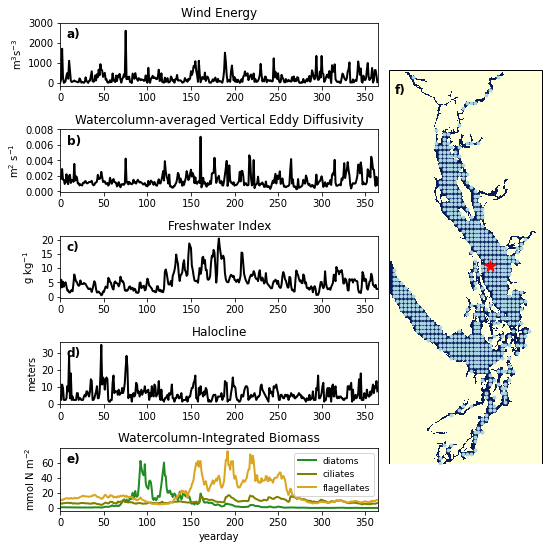

In [7]:
fact = .85
tfs = 10
markersize = 8.5
fig = plt.figure(figsize=(9.1*fact, 9.09*fact))
plt.rcParams['image.cmap'] = 'YlGnBu'

ax5 = plt.subplot2grid((5,6), (0,0), colspan=4, rowspan=1)
ax5.plot(daze,wind,'k-',lw = 2); ax5.set_xlim(0,365)
ax5.set_title('Wind Energy', fontsize = tfs + 2); ax5.set_xticks(np.arange(0,400,50))
ax5.set_ylabel('m$^{3}$s$^{-3}$', fontsize = tfs); ax5.set_yticks(np.arange(0,3500,1000))
ax5.text(0.02,.76,'a)', fontsize = 12, weight = 'bold', transform=ax5.transAxes)

ax5 = plt.subplot2grid((5,6), (1,0), colspan=4, rowspan=1)
ax5.text(0.02,.76,'b)', fontsize = 12, weight = 'bold', transform=ax5.transAxes); 
ax5.set_yticks(np.arange(0,70,20))
ax5.plot(daze,ved,'k-',lw = 2); ax5.set_xlim(0,365); ax5.set_yticks(np.arange(0,0.01,0.002))
ax5.set_title('Watercolumn-averaged Vertical Eddy Diffusivity', fontsize = tfs + 2); 
ax5.set_ylabel('m$^{2}$ s$^{-1}$', fontsize = tfs)


ax5 = plt.subplot2grid((5,6), (2,0), colspan=4, rowspan=1)
ax5.text(0.02,.76,'c)', fontsize = 12, weight = 'bold', transform=ax5.transAxes)
ax5.plot(daze,fwi/4,'k-',lw = 2); ax5.set_xlim(0,365); ax5.set_yticks(np.arange(0,25,5))
ax5.set_title('Freshwater Index', fontsize = tfs + 2); ax5.set_xticks(np.arange(0,400,50))
ax5.set_ylabel('g kg$^{-1}$', fontsize = tfs)

#halocline depth
ax5 = plt.subplot2grid((5,6), (3,0), colspan=4, rowspan=1)
ax5.text(0.02,.76,'d)', fontsize = 12, weight = 'bold', transform=ax5.transAxes)
ax5.plot(daze,halo,'k-',lw = 2); ax5.set_xlim(0,365); ax5.set_yticks(np.arange(0,35,10))
ax5.set_title('Halocline', fontsize = tfs + 2); ax5.set_xticks(np.arange(0,400,50))
ax5.set_ylabel('meters', fontsize = tfs)

ax5 = plt.subplot2grid((5,6), (4,0), colspan=4, rowspan=1)
ax5.text(0.02,.76,'e)', fontsize = 12, weight = 'bold', transform=ax5.transAxes)
ax5.plot(daze,diat,color = 'forestgreen',lw = 2, label = 'diatoms'); ax5.set_xlim(0,365)
ax5.plot(daze,cili, color = 'olive',lw = 2, label = 'ciliates'); ax5.set_xlim(0,365)
ax5.plot(daze,flag,color = 'goldenrod',lw = 2, label = 'flagellates'); ax5.set_xlim(0,365)
ax5.set_xlabel('yearday')
ax5.legend(loc = 'upper right', fontsize = tfs -1)
ax5.set_title('Watercolumn-Integrated Biomass', fontsize = tfs + 2); ax5.set_xticks(np.arange(0,400,50))
ax5.set_ylabel('mmol N m$^{-2}$', fontsize = tfs); ax5.set_yticks(np.arange(0,70,20))

ax = plt.subplot2grid((5,6), (0,4), colspan=2, rowspan=5)
ax.text(0.04,.94,'f)', fontsize = 12, weight = 'bold', transform=ax.transAxes)
viz_tools.set_aspect(ax)   
fmask = (grid.fmask[0,0,:,:])    
mesh = ax.pcolormesh(fmask, vmin=0, vmax=1)
pts = ax.scatter(d_stn_xar_noedge,d_stn_yar_noedge,\
                 s=markersize,c='lightblue',marker='o')
pts = ax.scatter(d_stn_xar[417],d_stn_yar[417],\
                 s=140 ,c='red',marker='*')

ax.set_xticklabels( () ) 
ax.set_yticklabels( () ) 
ax.patch.set_visible(False)
ax.axis('off')
ax.add_patch(Rectangle([0,0],397,898,\
                       fill=False, edgecolor='k', zorder=10))

plt.tight_layout()

#out=ax.set(title='Domain Extent')

#fig.savefig('./paper_figs/MF03_samplesignal.pdf', bbox_inches='tight')
fig.savefig('./paper_figs/MF03-samplesignal.jpg', bbox_inches='tight', dpi = 300)
